Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [3]:
import pandas as pd
import numpy as np

In [5]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
data['labels'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, columns=['animal', 'age', 'visits', 'priority', 'labels'])
df.set_index('labels')

,animal,age,visits,priority
labels,,,,
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
 4   labels    10 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 528.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [8]:
df.head(3)

,animal,age,visits,priority,labels
0,cat,2.5,1,yes,a
1,cat,3.0,3,yes,b
2,snake,0.5,2,no,c


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [15]:
data1= df[['animal','age']]
data1

,animal,age
0,cat,2.5
1,cat,3.0
2,snake,0.5
3,dog,NaN
4,dog,5.0
5,cat,2.0
6,snake,4.5
7,cat,NaN
8,dog,7.0
9,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [19]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
3,dog,NaN
4,dog,5.0
8,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [20]:
df[df['visits'] > 3]

,animal,age,visits,priority,labels


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [21]:
df[df['age'].isnull()]

,animal,age,visits,priority,labels
3,dog,NaN,3,yes,d
7,cat,NaN,1,yes,h


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [22]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority,labels
0,cat,2.5,1,yes,a
5,cat,2.0,3,no,f


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [23]:
df[df['age'].between(2, 4)]

,animal,age,visits,priority,labels
0,cat,2.5,1,yes,a
1,cat,3.0,3,yes,b
5,cat,2.0,3,no,f
9,dog,3.0,1,no,j


**10.** Change the age in row 'f' to 1.5.

In [25]:
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority,labels
0,cat,2.5,1.0,yes,a
1,cat,3.0,3.0,yes,b
2,snake,0.5,2.0,no,c
3,dog,NaN,3.0,yes,d
4,dog,5.0,2.0,no,e
5,cat,2.0,3.0,no,f
6,snake,4.5,1.0,no,g
7,cat,NaN,1.0,yes,h
8,dog,7.0,2.0,no,i
9,dog,3.0,1.0,no,j


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [26]:
df['visits'].sum()

19.0

**12.** Calculate the mean age for each different animal in `df`.

In [27]:
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [29]:
df.loc[k] = [5.5, 'dog', 'no', 2]

NameError: ignored

**14.** Count the number of each type of animal in `df`.

In [30]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [31]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority,labels
8,dog,7.0,2.0,no,i
4,dog,5.0,2.0,no,e
6,snake,4.5,1.0,no,g
9,dog,3.0,1.0,no,j
1,cat,3.0,3.0,yes,b
0,cat,2.5,1.0,yes,a
5,cat,2.0,3.0,no,f
f,NaN,1.5,NaN,NaN,NaN
2,snake,0.5,2.0,no,c
7,cat,NaN,1.0,yes,h


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [33]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority,labels
0,cat,2.5,1.0,NaN,a
1,cat,3.0,3.0,NaN,b
2,snake,0.5,2.0,NaN,c
3,dog,NaN,3.0,NaN,d
4,dog,5.0,2.0,NaN,e
5,cat,2.0,3.0,NaN,f
6,snake,4.5,1.0,NaN,g
7,cat,NaN,1.0,NaN,h
8,dog,7.0,2.0,NaN,i
9,dog,3.0,1.0,NaN,j


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [34]:
df['animal'] = df['animal'].replace('snake', 'python')

**18.** Load the ny-flights dataset to Python

In [35]:
from google.colab import files
uploaded = files.upload()

Saving ny-flights.csv to ny-flights.csv


In [36]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ny-flights.csv']))
df

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


In [45]:
df.airline_id.value_counts(max)

20409    0.235481
19790    0.182687
20398    0.116924
19805    0.116587
20366    0.099918
19393    0.092088
20355    0.075323
19977    0.053130
21171    0.014459
20437    0.009896
20436    0.001585
19690    0.001393
20304    0.000528
Name: airline_id, dtype: float64

**20.** Draw a plot between dep_delay and arr_delay

In [38]:
from matplotlib import pyplot as plt

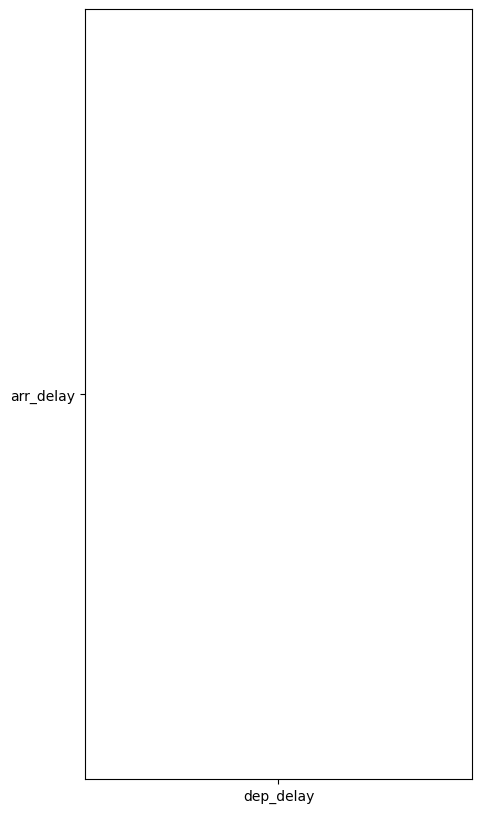

In [43]:
fig = plt.figure(figsize=(5,10))
plt.bar('dep_delay', 'arr_delay')
plt.show()